                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

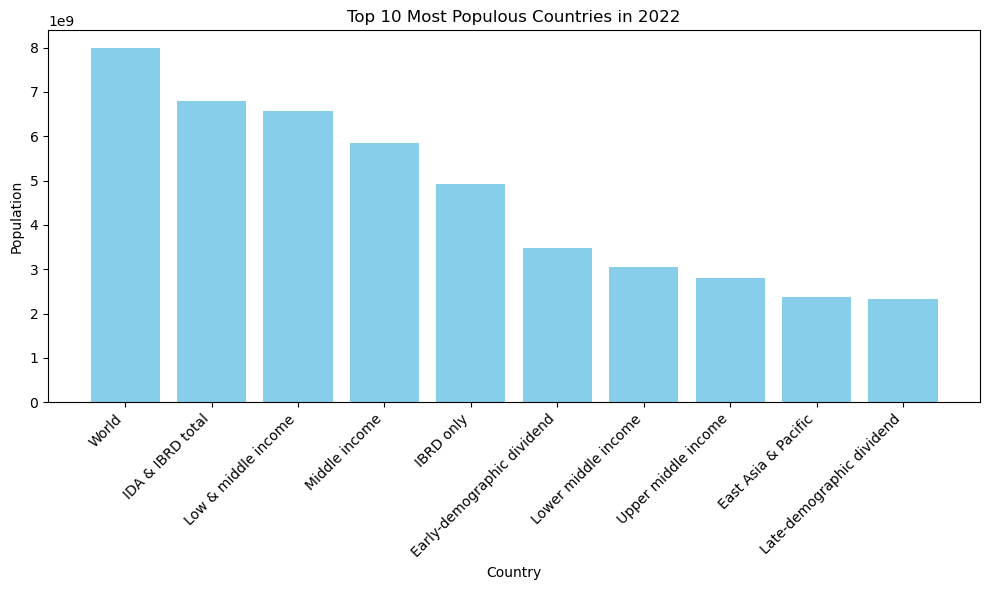

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_2590.csv", skiprows=4)
print(data.head())
pop_2022 = data[['Country Name', '2022']].dropna()
top10 = pop_2022.sort_values(by='2022', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top10['Country Name'], top10['2022'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Populous Countries in 2022")
plt.xlabel("Country")
plt.ylabel("Population")
plt.tight_layout()
plt.show()




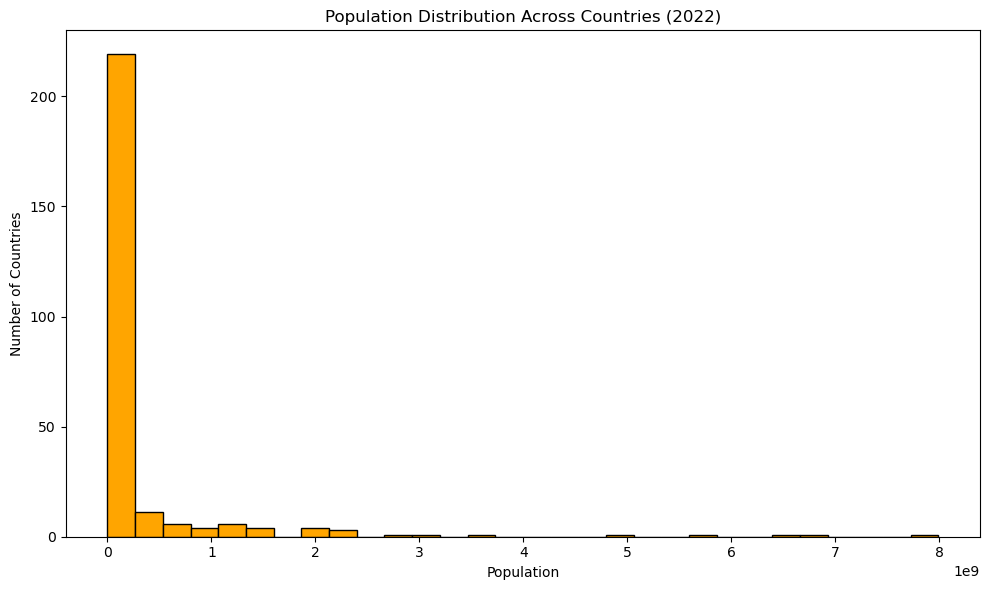

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_2590.csv", skiprows=4)
pop_2022 = data[['Country Name', '2022']].dropna()
plt.figure(figsize=(10, 6))
plt.hist(pop_2022['2022'], bins=30, color='orange', edgecolor='black')
plt.title("Population Distribution Across Countries (2022)")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()


Missing values per column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


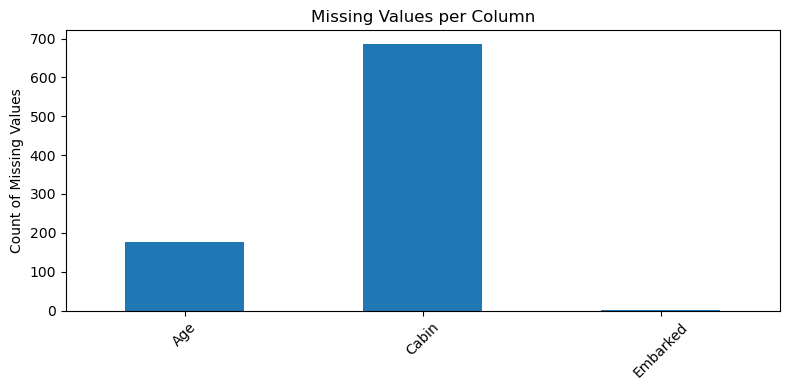


Missing values after cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


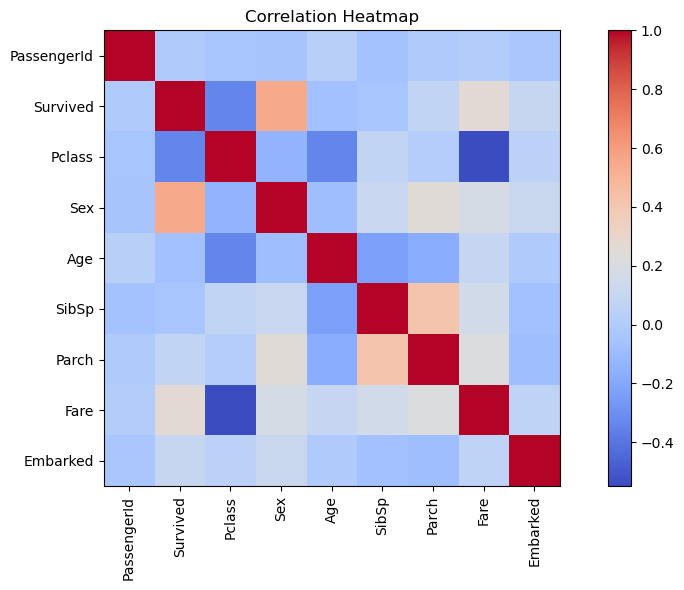

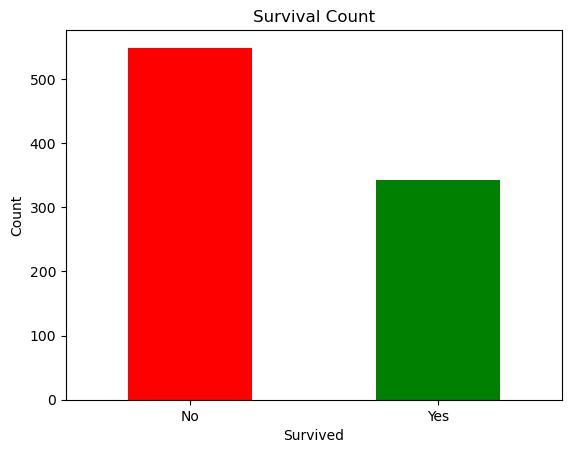

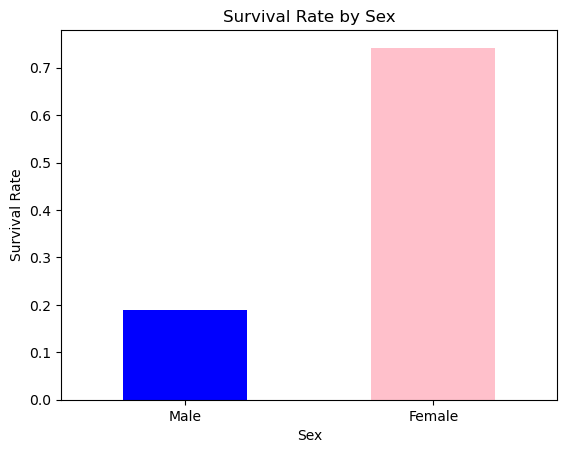

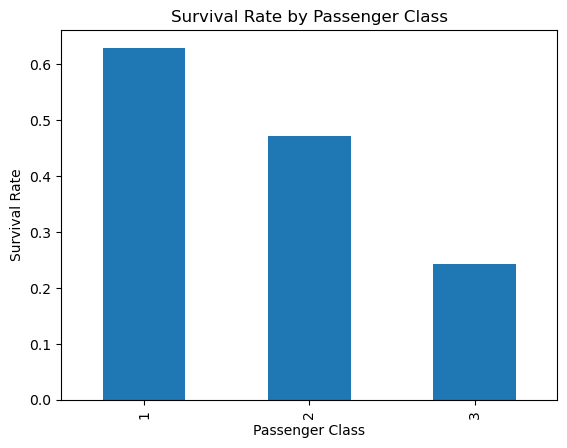

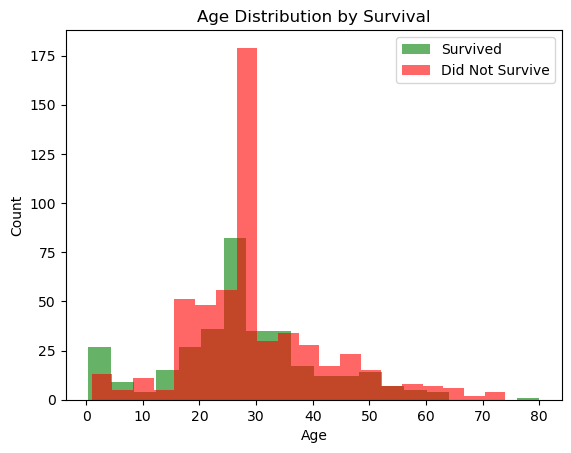

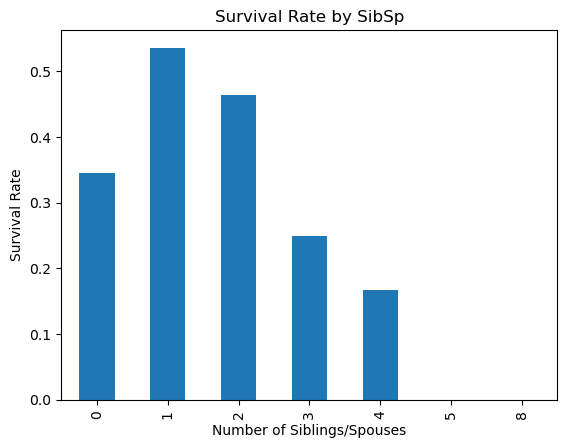

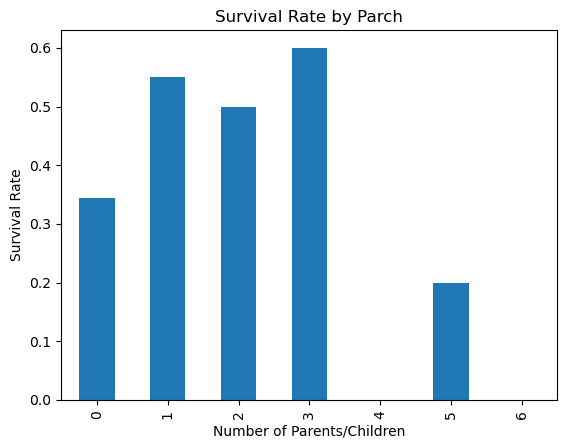

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

print("Missing values per column:\n")
print(df.isnull().sum())

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.plot(kind='bar', title='Missing Values per Column', figsize=(8, 4))
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df = df.drop(columns=['Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print("\nMissing values after cleaning:\n")
print(df.isnull().sum())

numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

plt.figure(figsize=(10, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

df['Survived'].value_counts().plot(kind='bar', title='Survival Count', color=['red', 'green'])
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

df.groupby('Sex')['Survived'].mean().plot(kind='bar', title='Survival Rate by Sex', color=['blue', 'pink'])
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.ylabel('Survival Rate')
plt.show()

df.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.6, label='Survived', color='green')
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.6, label='Did Not Survive', color='red')
plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

df.groupby('SibSp')['Survived'].mean().plot(kind='bar', title='Survival Rate by SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

df.groupby('Parch')['Survived'].mean().plot(kind='bar', title='Survival Rate by Parch')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()


Accuracy: 0.8718232044198895

Confusion Matrix:
 [[743  64]
 [ 52  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



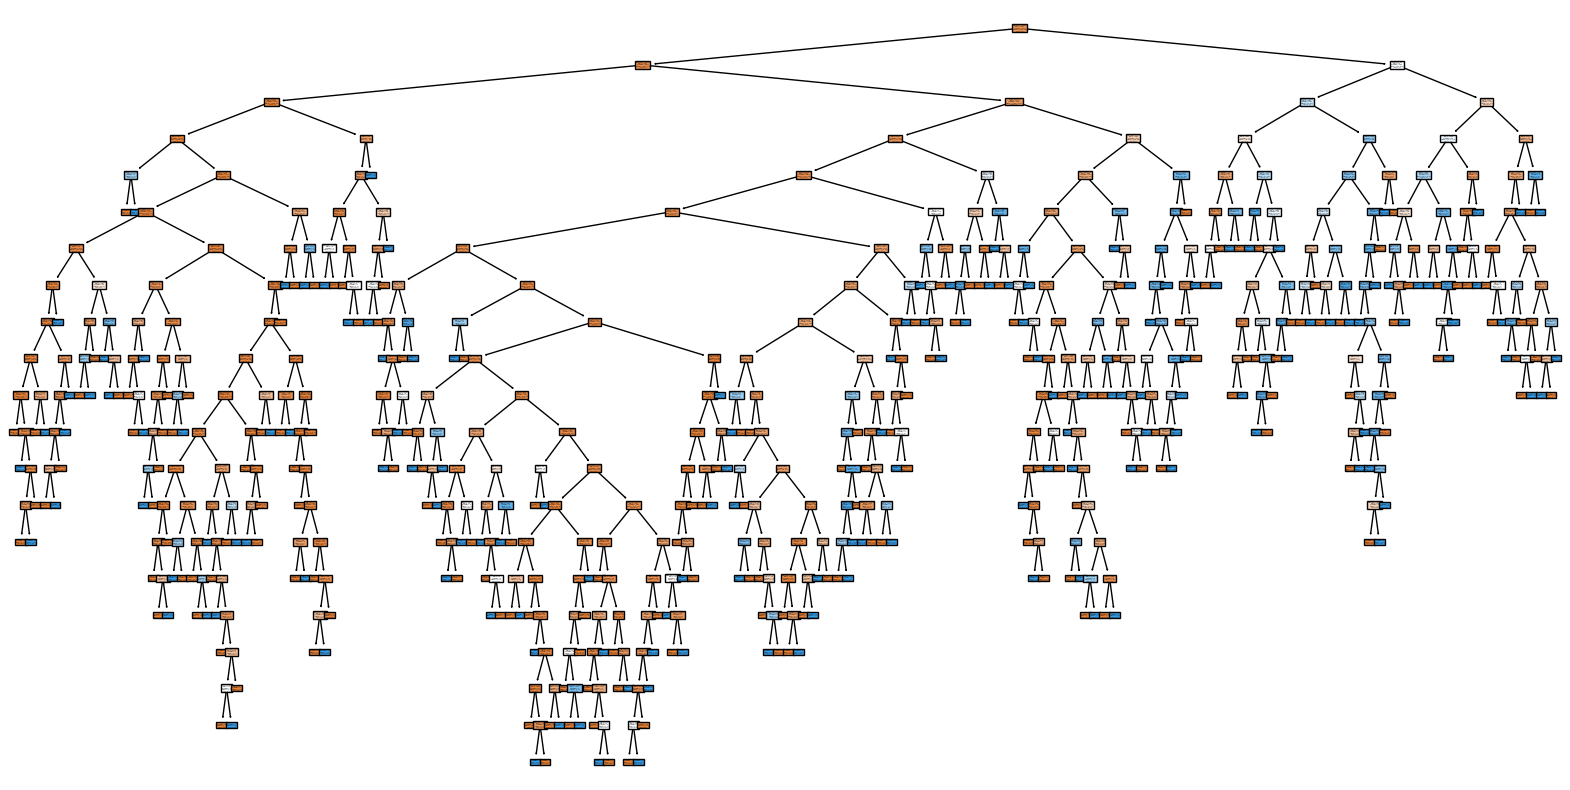

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


df = pd.read_csv("bank.csv", sep=';')

for column in df.select_dtypes(include='object').columns:
    df[column] = LabelEncoder().fit_transform(df[column])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


In [4]:
!pip install wordcloud

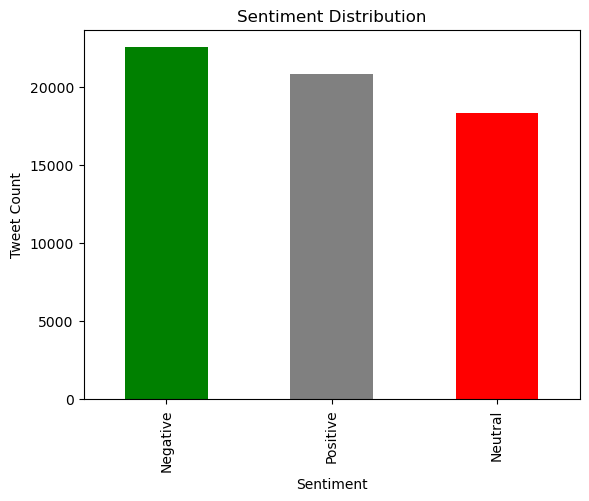

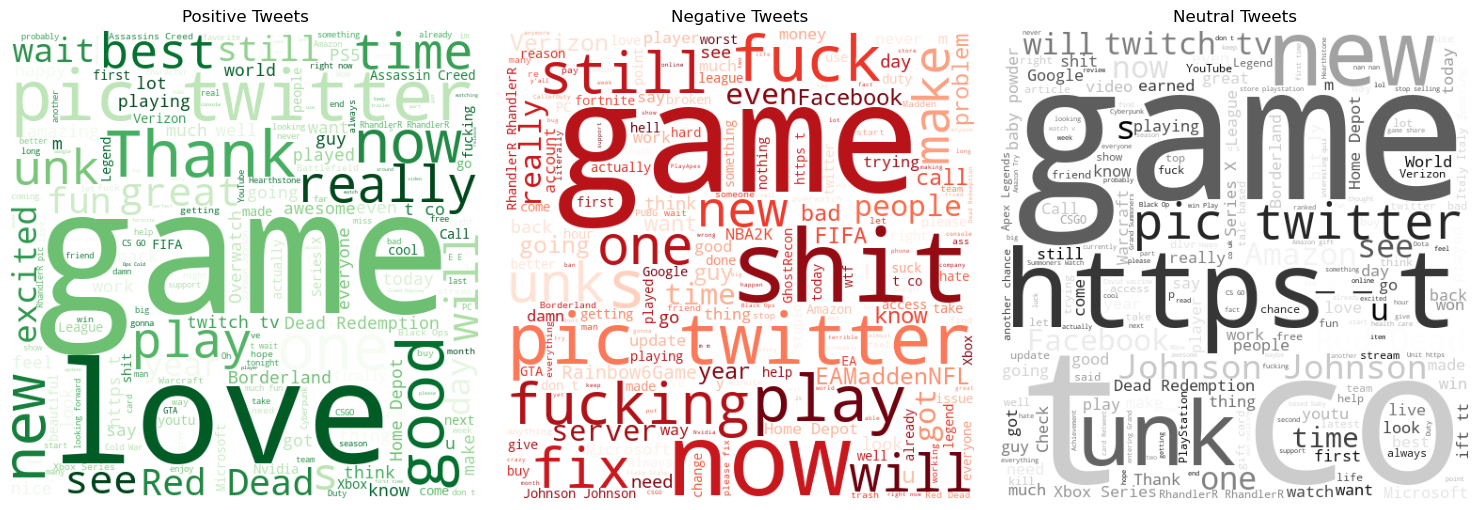

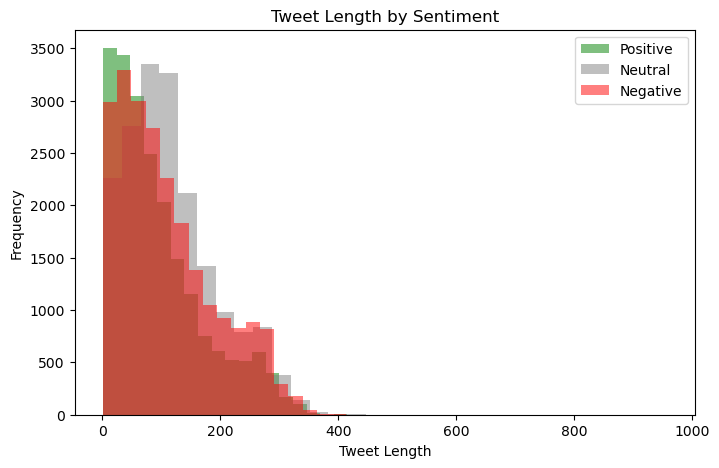

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("twitter_training.csv", header=None, names=["entity", "sentiment", "content"])
df = df[df["sentiment"].isin(["Positive", "Negative", "Neutral"])]

sentiment_counts = df["sentiment"].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'], title='Sentiment Distribution')
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

positive_words = " ".join(df[df["sentiment"] == "Positive"]["content"].astype(str))
negative_words = " ".join(df[df["sentiment"] == "Negative"]["content"].astype(str))
neutral_words = " ".join(df[df["sentiment"] == "Neutral"]["content"].astype(str))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(WordCloud(width=500, height=500, background_color='white', colormap='Greens').generate(positive_words))
plt.axis("off")
plt.title("Positive Tweets")

plt.subplot(1, 3, 2)
plt.imshow(WordCloud(width=500, height=500, background_color='white', colormap='Reds').generate(negative_words))
plt.axis("off")
plt.title("Negative Tweets")

plt.subplot(1, 3, 3)
plt.imshow(WordCloud(width=500, height=500, background_color='white', colormap='gray').generate(neutral_words))
plt.axis("off")
plt.title("Neutral Tweets")
plt.tight_layout()
plt.show()

df["content_length"] = df["content"].astype(str).apply(len)

sentiments = ["Positive", "Neutral", "Negative"]
colors = ["green", "gray", "red"]

plt.figure(figsize=(8, 5))
for i, sentiment in enumerate(sentiments):
    lengths = df[df["sentiment"] == sentiment]["content_length"]
    plt.hist(lengths, bins=30, alpha=0.5, label=sentiment, color=colors[i])
plt.legend()
plt.title("Tweet Length by Sentiment")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()


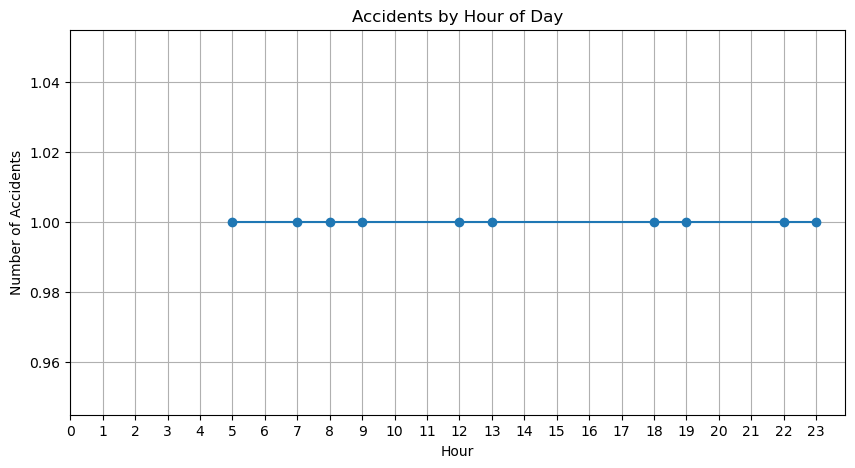

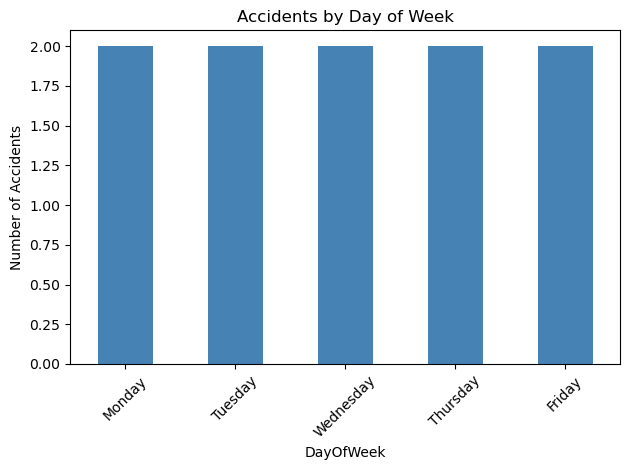

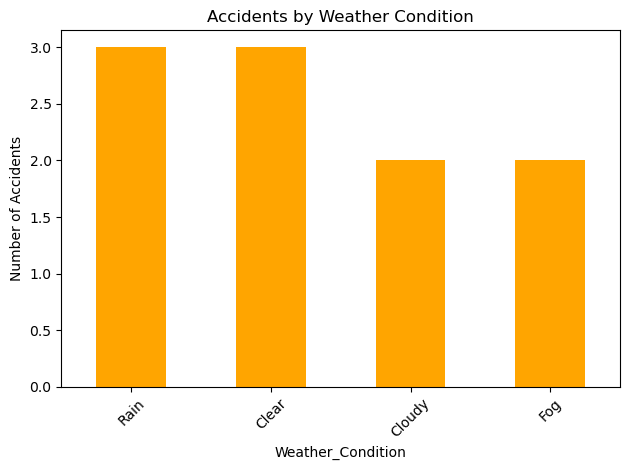

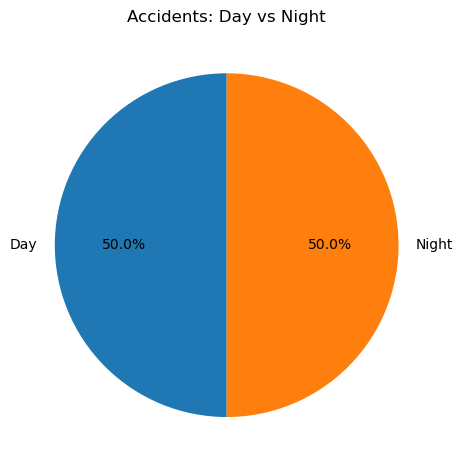

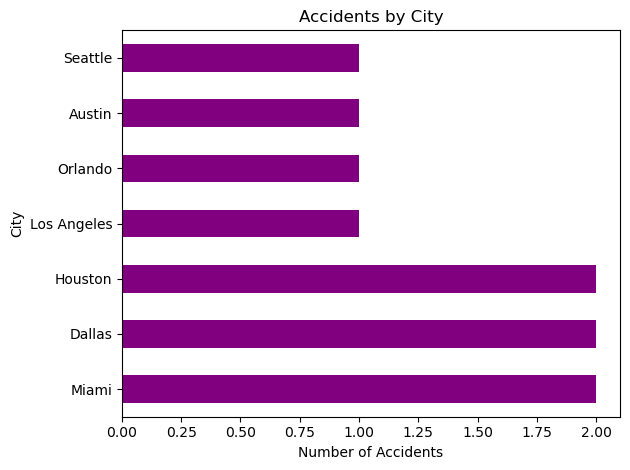

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'ID': ['A-1', 'A-2', 'A-3', 'A-4', 'A-5', 'A-6', 'A-7', 'A-8', 'A-9', 'A-10'],
    'Severity': [2, 3, 2, 4, 1, 3, 2, 3, 4, 2],
    'Start_Time': ['2021-11-01 08:00', '2021-11-01 19:30', '2021-11-02 07:45', '2021-11-02 23:00',
                   '2021-11-03 13:15', '2021-11-03 05:00', '2021-11-04 18:45', '2021-11-04 09:30',
                   '2021-11-05 22:10', '2021-11-05 12:00'],
    'City': ['Miami', 'Los Angeles', 'Dallas', 'Houston', 'Orlando', 'Austin', 'Seattle', 'Miami', 'Dallas', 'Houston'],
    'Weather_Condition': ['Rain', 'Clear', 'Cloudy', 'Rain', 'Clear', 'Fog', 'Rain', 'Cloudy', 'Clear', 'Fog'],
    'Temperature(F)': [78, 65, 72, 70, 80, 60, 55, 76, 68, 59],
    'Sunrise_Sunset': ['Day', 'Night', 'Day', 'Night', 'Day', 'Night', 'Night', 'Day', 'Night', 'Day']
}

df = pd.DataFrame(data)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

hourly_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

day_counts = df['DayOfWeek'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order).dropna()
day_counts.plot(kind='bar', color='steelblue', title='Accidents by Day of Week')
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

weather_counts = df['Weather_Condition'].value_counts()
weather_counts.plot(kind='bar', color='orange', title='Accidents by Weather Condition')
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sunrise_counts = df['Sunrise_Sunset'].value_counts()
sunrise_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Accidents: Day vs Night')
plt.ylabel("")
plt.tight_layout()
plt.show()

top_cities = df['City'].value_counts()
top_cities.plot(kind='barh', color='purple', title='Accidents by City')
plt.xlabel("Number of Accidents")
plt.tight_layout()
plt.show()
